# Long Homework 1

## AMPTH 207: Stochastic Methods for Data Analysis, Inference and Optimization
 
**Due Date:** Thursday, Febrary 23rd, 2017 at 11:59pm

**Instructions:**

- Upload your final answers as well as your iPython notebook containing all work to Canvas.

- Structure your notebook and your work to maximize readability.

## Premise

In supervised machine learning, a function that maps certain input data to a set of outputs is inferred from a labelled dataset called the training set, and the resulting learnt funtion is then used to make predictions on unseen new examples of the dataset (the test set).

The goal of this homework is to construct a classifier known as the single-hidden-layer Multi-Layer Perceptron (MLP), an artificial neural netwok. You are asked to train the classifier using mini-batch gradient descent, validate it, and then apply it to a test dataset to make predictions. We will use the [*MNIST* dataset](https://en.wikipedia.org/wiki/MNIST_database), which consists of 70,000 images of handwritten digits, each of which is 28x28 pixels. You can use the first 50,000 images as the training set, the next 10,000 images as the validation set, and the last 10,000 images as the test set.

You will proceed in 2 steps (each step is a problem) to build the MLP. Please use Theano to program the classifiers.

## Problem 1. Stochastic gradient descent for the logistic regresion

First, build a logistic regression classifier whose input is the array of pixel values in one image, and whose output is the most likely class of the vector. In order to familiarize yourself with the dataset, plot some of the images beforehand, and think about the pixel values as features of the input vector.

### Part A

Using the softmax formulation, write a Theano expression graph that:
* Calculates the probability of a target element belonging to class $i$ (i.e., the probability that a given image represents a digit between 0 and 9).
* Maximizes it over all classes, and computes the cost function using an L2 regularization approach
* Minimizes the resulting cost function using mini-batch gradient descent. How long does it take for your code to train with 50,000 training examples of the dataset?

*Hint: Use a batch size of 256 examples, a learning rate $\eta = 0.1$, and a regularization factor $\lambda=0.01$*.

### Part B

* Evaluate the validation loss function periodically as you train the classifier and plot it as a function of the epoch. Plot this loss function for several values of the regularization factor.
* When should you stop the training for different values of $\lambda$? Give an approximate answer supported by using the plots.
* Select what you consider the best regularization factor and predict the classes of the test set. Compare with the given labels. What is the test error that you obtain?

## Problem 2. The Multilayer Perceptron (with one hidden layer)
The multilayer perceptron can be understood as a logistic regression classifier in which the input is first transformed using a learnt non-linear transformation. The non-linear transformation is usually chosen to be either the logistic function or the $\tanh$ function, and its purpose is to project the data into a space where it becomes linealry separable The output of this so-called hidden layer is then passed to the logistic regression graph that we have constructed in the first problem. In matrix notation:

$$G(b^{(2)}+W^{(2)}(s(b^{(1)}W^{(1)}x)))$$

with bias vectors $b^{(1)}$, $b^{(2)}$; weight matrices $W^{(1)}$, $W^{(2)}$ and activation functions $G$ and $s$. Here is a diagram:

![](http://deeplearning.net/tutorial/_images/mlp.png){:height=300 width=300}

### Part A

Using a similar architecture as in the first part and the same MNIST dataset, built a Theano graph for the multilayer perceptron, using the $\tanh$ function as the non-linearity. Use $\eta = 0.1$ and $\lambda = 0.001$. Experiment with the batch size (use 20, 50, and 100 examples) and the number of units in your hidden layer (use 50, 100, and 200 units). For what combination of these parameters do you obtain the smallest value of the validation loss function after 50 epochs?

### Part B

Stop the trainning at a convenient validation loss and use the trained classifier to predict for the test set. How much better is your test error as compared to the logistic regression classifier?

*Hint 1:* The initialization of the weights matrix for the hidden layer must assure that the units (neurons) of the perceptron operate in a regime where information gets propagated. For the $\tanh$ function, it is advisable to initialize with the interval $[-\sqrt{\frac{6}{fan_{in}+fan_{out}}},\sqrt{\frac{6}{fan_{in}+fan_{out}}}]$, where $fan_{in}$ is the number of units in the $(i-1)$-th layer, and $fan_{out}$ is the number of units in the i-th layer.

*Hint 2:* You should feel free to get inspiration from [these tutorials](http://deeplearning.net/tutorial/mlp.html). However, we expect you to write your own code, inspired by the architecture shown in the lab.




## Problem 1:

### Part A

## Calculates the probability of a target element belonging to class  i
  $$P(Y=i\text{ | } x,W,b)= softmax_i(Wx + b) = \frac{\exp{(W_ix +b_i)}}{\sum_j{\exp{(W_jx+b_j)}}}$$
  
  $$ y_{pred} = argmax_iP(Y=i\text{ | } x,W,b)$$

In [1]:
import gzip
import pickle
%pylab inline

import matplotlib.pyplot as plt
import six.moves.cPickle as pickle

import timeit

import numpy as np

import theano
import theano.tensor as T
import matplotlib.pyplot as plt
import csv
import pandas as pd
import six.moves.cPickle as pickle

Populating the interactive namespace from numpy and matplotlib


In [2]:
# To read the dataset
dataset='mnist.pkl.gz'
with gzip.open(dataset, 'rb') as f:
        try:
            train_set, valid_set, test_set = pickle.load(f, encoding='latin1')
        except:
            train_set, valid_set, test_set = pickle.load(f)

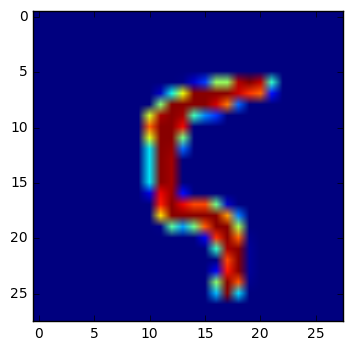

In [3]:
plt.imshow(train_set[0][100].reshape((28,28)))
#print (train_set[1][100])



In [88]:

def logistic(lam,n_epochs):
    
   
    batch_size = 256  # Size of minibatch
    n_train_batches = shape(train_set[0])[0] // batch_size
    n_valid_batches = shape(valid_set[0])[0] // batch_size
    n_test_batches = shape(test_set[0])[0] // batch_size

    x = T.dmatrix("x")
    y = T.lvector("y")
    
    num = np.unique(train_set[1][:]).shape[0]

    w = theano.shared(np.random.randn(train_set[0].shape[1], num),
                    name='w',borrow=True)

    # initialize the bias term
    b = theano.shared(value=numpy.zeros((num,),dtype=theano.config.floatX),
                name='b',borrow=True)

    # Construct Theano expression graph
    p_y_given_x = T.nnet.softmax(T.dot(x, w) + b)   # Probability that target belongs to class i
    prediction = T.argmax(p_y_given_x, axis=1)      # The prediction of the model (class whose probability is maximal)
    loss = -T.mean(T.log(p_y_given_x)[T.arange(y.shape[0]), y])  # Loss function
    cost = loss.mean() + lam * (w ** 2).sum()      # The cost to minimize
    gw = T.grad(cost=cost, wrt=w)
    gb = T.grad(cost=cost, wrt=b)                   # Compute the gradient of the cost
                                                    # w.r.t weight vector w and

    eta = 0.1 # Learning rate
    
    error_train = []   
    validloss = [] 
   
    errors = T.mean(T.neq(prediction, y))                                               # bias term b

    start = timeit.default_timer()
    train = theano.function(
              inputs=[x,y],
              outputs=[prediction, loss],
              updates=((w, w - eta * gw), (b, b - eta * gb)),name='train')
    validate = theano.function(
              inputs=[x,y],
              outputs=[prediction, loss],name='validate')
    test = theano.function(
              inputs=[x,y],
              outputs=[prediction, loss,errors],name='test')
    predict = theano.function(inputs=[x], outputs=prediction, name='predict')
 

    for i in range(n_epochs):       
        for index in range(n_train_batches):  
            pred, err = train(train_set[0][index * batch_size: (index + 1) * batch_size], 
                              train_set[1][index * batch_size: (index + 1) * batch_size])
            error_train.append(err)  

        pred_val, valid_error = validate(valid_set[0], valid_set[1])
        
        validloss.append(valid_error)
    end = timeit.default_timer()  # starting time of GD        
    prediction, test_loss,test_error = test(test_set[0], test_set[1])
    time_total = end-start
    print(
        (
                'Optimization complete with best validation score of %f '
        )
        % (valid_error)
    )
    print ('Total time: %f sec' %(time_total))
    
    print ('The code run for %d epochs, with %f epochs/sec' % (n_epochs, 1. * n_epochs / (time_total)))
    

    return validloss,test_loss,test_error

## Part A
### (When using a batch size of 256 examples, a learning rate $\eta = 0.1$, and a regularization factor $\lambda=0.01$)

In [29]:
lam = 0.01
error_valid = logistic(lam,50)


Optimization complete with best validation score of 0.438487 
Total time: 12.225829 sec
The code run for 50 epochs, with 4.089702 epochs/sec


## Part B.a

In [56]:
lamlist = [0.00001,0.0001,0.001,0.01,0.1,1,10]
validation_losslist1 = list()
for i in range(len(lamlist)):
    validation_losslist,test_loss,test_error = logistic(lamlist[i],20)    
    validation_losslist1.append(validation_losslist)

Optimization complete with best validation score of 0.555846 
Total time: 4.773983 sec
The code run for 20 epochs, with 4.189374 epochs/sec
Optimization complete with best validation score of 0.532657 
Total time: 5.526127 sec
The code run for 20 epochs, with 3.619171 epochs/sec
Optimization complete with best validation score of 0.345821 
Total time: 4.888728 sec
The code run for 20 epochs, with 4.091044 epochs/sec
Optimization complete with best validation score of 0.439419 
Total time: 4.428491 sec
The code run for 20 epochs, with 4.516211 epochs/sec
Optimization complete with best validation score of 0.929171 
Total time: 4.284027 sec
The code run for 20 epochs, with 4.668505 epochs/sec
Optimization complete with best validation score of 1.880129 
Total time: 5.110333 sec
The code run for 20 epochs, with 3.913639 epochs/sec
Optimization complete with best validation score of 6458.907999 
Total time: 4.180647 sec
The code run for 20 epochs, with 4.783949 epochs/sec


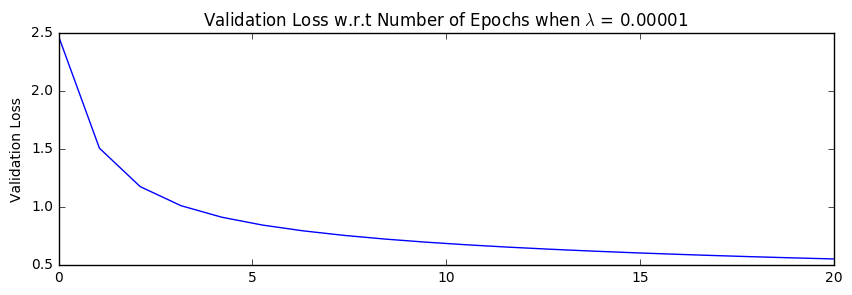

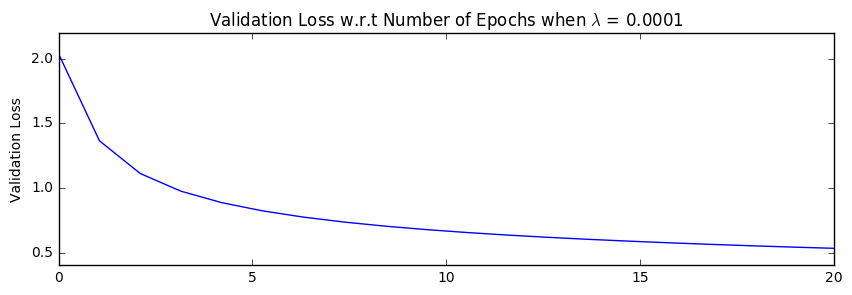

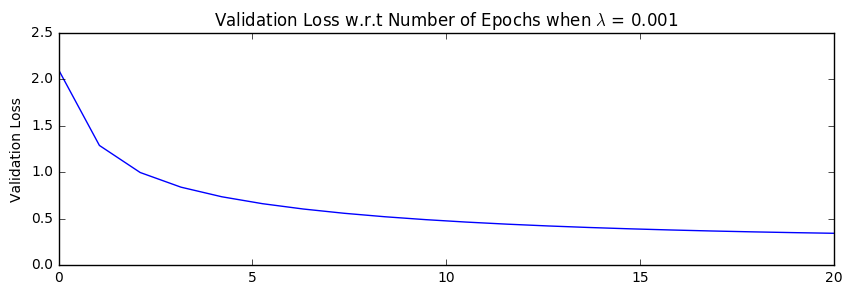

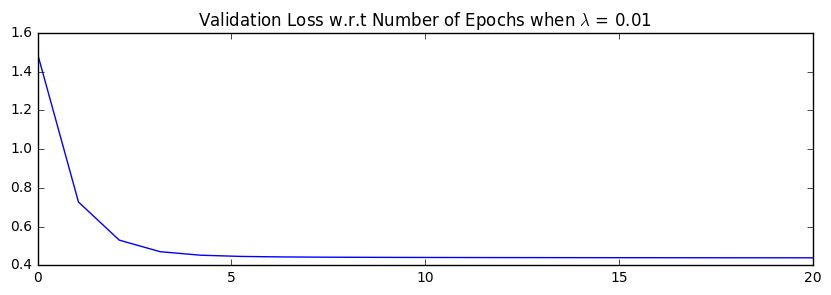

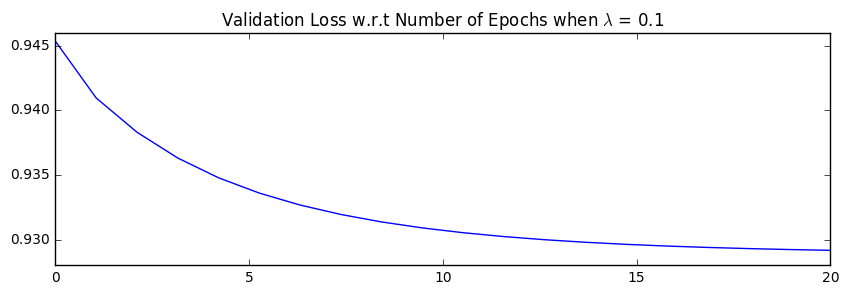

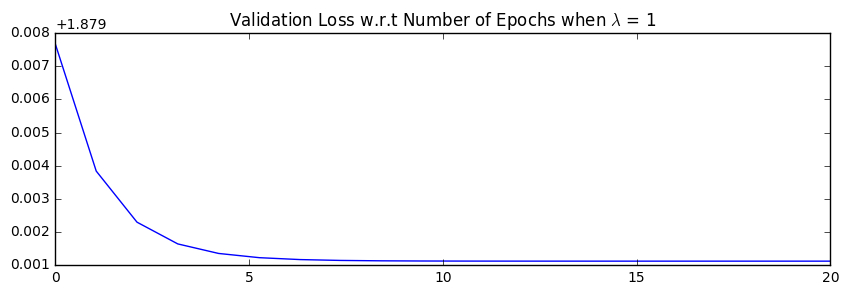

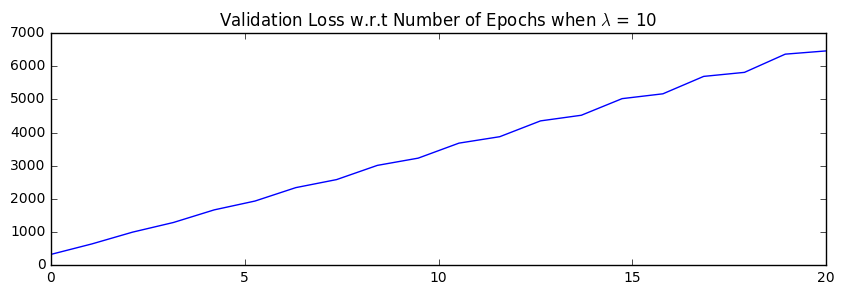

In [114]:
plt.figure(figsize=(10,3))

epochlist2 = np.linspace(0,20,20)
plt.plot(epochlist2,validation_losslist1[0])
plt.title('Validation Loss w.r.t Number of Epochs when $\lambda$ = 0.00001')
plt.ylabel('Validation Loss')
plt.show()

plt.figure(figsize=(10,3))
plt.plot(epochlist2,validation_losslist1[1])
plt.title('Validation Loss w.r.t Number of Epochs when $\lambda$ = 0.0001')
plt.ylabel('Validation Loss')
plt.show()

plt.figure(figsize=(10,3))
plt.plot(epochlist2,validation_losslist1[2])
plt.title('Validation Loss w.r.t Number of Epochs when $\lambda$ = 0.001')
plt.ylabel('Validation Loss')
plt.show()

plt.figure(figsize=(10,3))
plt.title('Validation Loss w.r.t Number of Epochs when $\lambda$ = 0.01')
plt.plot(epochlist2,validation_losslist1[3])
plt.show()


plt.figure(figsize=(10,3))
plt.title('Validation Loss w.r.t Number of Epochs when $\lambda$ = 0.1')
plt.plot(epochlist2,validation_losslist1[4])
plt.show()

plt.figure(figsize=(10,3))
plt.title('Validation Loss w.r.t Number of Epochs when $\lambda$ = 1')
plt.plot(epochlist2,validation_losslist1[5])
plt.show()

plt.figure(figsize=(10,3))
plt.title('Validation Loss w.r.t Number of Epochs when $\lambda$ = 10')
plt.plot(epochlist2,validation_losslist1[6])
plt.show()


## Part B.b

### Summary:
As shown from the plots above, we can see that the validation loss decreases until converge to a constant value with repect the iteration number when $\lambda = 0.00001,0.0001,0.001,0.01,0.1,1$ 
Basically looking at the x axis,

when $\lambda = 0.00001$, we can stop training at the 20th epoch,

when $\lambda = 0.0001$, we can stop training at the 15th epoch,

when $\lambda = 0.001$, we can stop training at the 12th epoch,

when $\lambda = 0.01$, we can stop training at the 5th epoch,

when $\lambda = 0.1$, we can stop training at the 20th epoch,

when $\lambda = 1$, we can stop training at the 5th epoch,

Since we can stop within a reasonable epoch number, the operating efficiency can be improved.

However, when $\lambda = 10$, the validation increases to a very large number which will dominate our cost function, which make our parameters much small and does not make any sense. 




## Part B.c

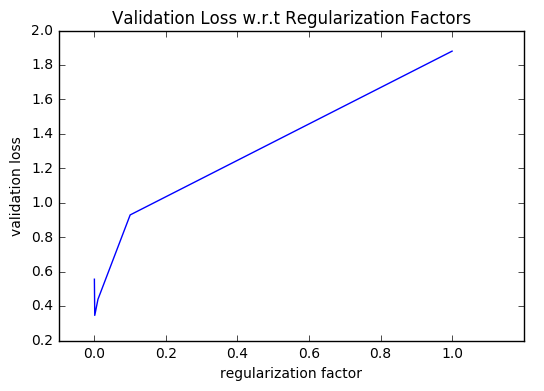

In [78]:
vali_mini1 = list()
for i in range (len(lamlist)):
    vali_mini1.append(validation_losslist1[i][-1])

plt.plot(lamlist[:6],vali_mini1[:6])
plt.xlabel('regularization factor')
plt.ylabel('validation loss')
#plt.ylim(0,2)
plt.title('Validation Loss w.r.t Regularization Factors')
plt.xlim(-0.1,1.2)
plt.show()





### Zoom it to find the minimum point when $\lambda = 0.001$

(0.0001, 0.01)

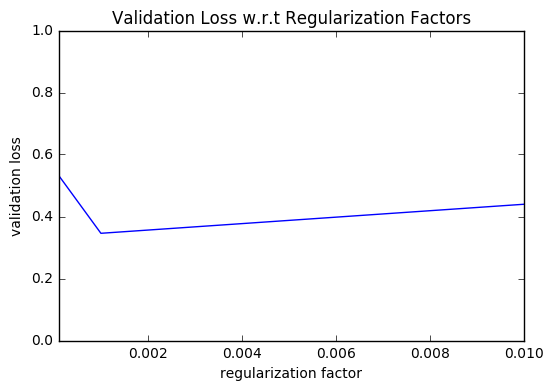

In [80]:
###Zoom it
plt.plot(lamlist[:6],vali_mini1[:6])
plt.xlabel('regularization factor')
plt.ylabel('validation loss')
#plt.ylim(0,2)
plt.title('Validation Loss w.r.t Regularization Factors')
ylim(0,1)
plt.xlim(0.0001,0.01)

### Summary

According to the polt we can find the validation loss with repect to the regularization factor, between $\lambda = 0.00001$ and $0.001$, the trend goes down and after $\lambda = 0.001$, the validation loss starts to increase. In order to choose a best regularization factor depending on the plot, $\lambda = 0.001$ is a good choice.

In [98]:
lam_optim = 0.001
validation_losslist,test_loss,test_error = logistic(lam_optim,50) 
print ('Test_error: %f %%'%(test_error*100))

Optimization complete with best validation score of 0.297417 
Total time: 16.746158 sec
The code run for 50 epochs, with 2.985759 epochs/sec
Test_error: 8.210000 %


## Problem 2. The Multilayer Perceptron (with one hidden layer)
The multilayer perceptron can be understood as a logistic regression classifier in which the input is first transformed using a learnt non-linear transformation. The non-linear transformation is usually chosen to be either the logistic function or the $\tanh$ function, and its purpose is to project the data into a space where it becomes linealry separable The output of this so-called hidden layer is then passed to the logistic regression graph that we have constructed in the first problem. In matrix notation:

$$G(b^{(2)}+W^{(2)}(s(b^{(1)}W^{(1)}x)))$$

with bias vectors $b^{(1)}$, $b^{(2)}$; weight matrices $W^{(1)}$, $W^{(2)}$ and activation functions $G$ and $s$. Here is a diagram:

![](http://deeplearning.net/tutorial/_images/mlp.png){:height=300 width=300}

### Part A

Using a similar architecture as in the first part and the same MNIST dataset, built a Theano graph for the multilayer perceptron, using the $\tanh$ function as the non-linearity. Use $\eta = 0.1$ and $\lambda = 0.001$. Experiment with the batch size (use 20, 50, and 100 examples) and the number of units in your hidden layer (use 50, 100, and 200 units). For what combination of these parameters do you obtain the smallest value of the validation loss function after 50 epochs?

### Part B

Stop the trainning at a convenient validation loss and use the trained classifier to predict for the test set. How much better is your test error as compared to the logistic regression classifier?

*Hint 1:* The initialization of the weights matrix for the hidden layer must assure that the units (neurons) of the perceptron operate in a regime where information gets propagated. For the $\tanh$ function, it is advisable to initialize with the interval $[-\sqrt{\frac{6}{fan_{in}+fan_{out}}},\sqrt{\frac{6}{fan_{in}+fan_{out}}}]$, where $fan_{in}$ is the number of units in the $(i-1)$-th layer, and $fan_{out}$ is the number of units in the i-th layer.

*Hint 2:* You should feel free to get inspiration from [these tutorials](http://deeplearning.net/tutorial/mlp.html). However, we expect you to write your own code, inspired by the architecture shown in the lab.



In [ ]:
import os
import sys
import timeit

import numpy as np

import theano
import theano.tensor as T



In [116]:
def MLP(batch_size,n_hidden): 
    dataset='mnist.pkl.gz'
    with gzip.open(dataset, 'rb') as f:
                try:
                    train_set, valid_set, test_set = pickle.load(f, encoding='latin1')
                except:

                    train_set, valid_set, test_set = pickle.load(f)



    eta = 0.1
    L2_reg=0.001
    rng = np.random.RandomState(1234)

    # w,b for tanh(input layer to hidden layer)
    W_values = np.asarray(rng.uniform(low=-numpy.sqrt(6. /(len(train_set[0][0]) + n_hidden)), 
                                         high=numpy.sqrt(6. / (len(train_set[0][0]) + n_hidden)), size=((len(train_set[0][0]), n_hidden))),dtype=theano.config.floatX)

    w = theano.shared(value=W_values, name='W', borrow=True)
    b_values = numpy.zeros((n_hidden), dtype=theano.config.floatX)
    b = theano.shared(value=b_values, name='b', borrow=True)


    params = [w,b]
    train_set_x, train_set_y = train_set
    valid_set_x, valid_set_y = valid_set
    test_set_x, test_set_y = test_set

    def shared_dataset(data_xy, borrow=True):
        data_x, data_y = data_xy
        shared_x = theano.shared(np.asarray(data_x,dtype=theano.config.floatX),borrow=borrow)
        shared_y = theano.shared(np.asarray(data_y,dtype=theano.config.floatX),borrow=borrow)
        return shared_x, T.cast(shared_y, 'int32')


    test_set_x, test_set_y = shared_dataset(test_set)
    valid_set_x, valid_set_y = shared_dataset(valid_set)
    train_set_x, train_set_y = shared_dataset(train_set)

    n_train_batches = train_set_x.get_value(borrow=True).shape[0] // batch_size
    n_valid_batches = valid_set_x.get_value(borrow=True).shape[0] // batch_size
    n_test_batches = test_set_x.get_value(borrow=True).shape[0] // batch_size


    index = T.lscalar()  # index to a [mini]batch
    x = T.matrix('x')  # the data is presented as rasterized images
    y = T.ivector('y')


    # input layer to hidden layer
    lin_output = T.dot(x, w) + b
    activation_tanh_output = T.tanh(lin_output)

    #  w1,b1 for logistic (hidden layer to output layer)
    w1 = theano.shared(np.zeros((n_hidden, 10), dtype=theano.config.floatX),name='w',borrow=True)
    b1 = theano.shared(value=np.zeros((10,),dtype=theano.config.floatX),name='b',borrow=True)

    # transmit output from hidden layer    
    p_y_given_x = T.nnet.softmax(T.dot(activation_tanh_output, w1) + b1)
    y_pred = T.argmax(p_y_given_x, axis=1)  # maximum likelihood 
    params1 = [w1,b1]


    L2_sqr = (w ** 2).sum() + (w1 ** 2).sum()


    loss = -T.mean(T.log(p_y_given_x)[T.arange(y.shape[0]), y])

    errors = T.mean(T.neq(y_pred, y))   

    params_total =  params + params1

    cost = loss+ L2_reg * L2_sqr


    test_model = theano.function(
        inputs=[index],
        outputs= errors,
        givens={
            x: test_set_x[index * batch_size: (index + 1) * batch_size],
            y: test_set_y[index * batch_size: (index + 1) * batch_size]
        }
    )

    validate_model = theano.function(
        inputs=[index],
        outputs= cost,
        givens={
            x: valid_set_x[index * batch_size: (index + 1) * batch_size],
            y: valid_set_y[index * batch_size: (index + 1) * batch_size]
        }
    )

    gparams = [T.grad(cost, param) for param in params_total]
    updates = [
            (param, param - eta * gparam)
            for param, gparam in zip(params_total, gparams)
        ]

    train_model = theano.function(
        inputs=[index],
        outputs=cost,
        updates=updates,
        givens={
            x: train_set_x[index * batch_size: (index + 1) * batch_size],
            y: train_set_y[index * batch_size: (index + 1) * batch_size]
        }
    )



    validation_frequency = n_train_batches
                                  # go through this many
                                  # minibatche before checking the network
                                  # on the validation set; in this case we
                                  # check every epoch

    test_score = 0.
    n_epochs = 50
    start_time = timeit.default_timer()

    done_looping = False
    epoch = 0

    epochlist2 = list()
    validation_losslist2 = list()
    this  = 0


    while (epoch < n_epochs):
       # print (epoch)
        epoch = epoch + 1
        for minibatch_index in range(n_train_batches):

            minibatch_avg_cost = train_model(minibatch_index)
            # iteration number
            iter = (epoch - 1) * n_train_batches + minibatch_index

            if (iter + 1) % validation_frequency == 0:
                # compute zero-one loss on validation set
                validation_losses = [validate_model(i) for i in range(n_valid_batches)]
                this_validation_loss = np.mean(validation_losses)
                epochlist2.append(epoch)
                validation_losslist2.append(this_validation_loss)
                #print (best_validation_loss)

               # print (this_validation_loss)
                #if this_validation_loss < best_validation_loss: 
                if (epoch == 50):
                    test_losses = [test_model(i) for i in range(n_test_batches)]
                    test_score = numpy.mean(test_losses)

                       # print (best_validation_loss)
                    break

            #if this_validation_loss < best_validation_loss: 
             #   break



    end_time = timeit.default_timer()
    print(
            (
                    'Optimization complete with best validation score of %f '
            )
            % (this_validation_loss)
        )
    print ('Total time: %f sec' %(end_time - start_time))

    print ('The code run for %d epochs, with %f epochs/sec' % (epoch, 1. * epoch / (end_time - start_time)))
    return this_validation_loss,epochlist2,validation_losslist2,test_score


## Part A

In [117]:
batchlist = [20,50,100]
hidden = [50,100,200]
validation = list()
test_scorelist =list()
for i in range (len(batchlist)):
    for j in range(len(hidden)):
        print ('\n batch = %d,hidden = %d:'%(batchlist[i],hidden[j]))
        this_validation_loss,epochlist2,validation_losslist2,test_score = MLP(batchlist[i],hidden[j])
        test_scorelist.append(test_score)
        validation.append(validation_losslist2)
        print ('validation_losses:',this_validation_loss)




 batch = 20,hidden = 50:
Optimization complete with best validation score of 0.275577 
Total time: 54.830147 sec
The code run for 50 epochs, with 0.911907 epochs/sec
validation_losses: 0.275577079693

 batch = 20,hidden = 100:
Optimization complete with best validation score of 0.268007 
Total time: 83.082101 sec
The code run for 50 epochs, with 0.601814 epochs/sec
validation_losses: 0.268007476227

 batch = 20,hidden = 200:
Optimization complete with best validation score of 0.269149 
Total time: 166.494538 sec
The code run for 50 epochs, with 0.300310 epochs/sec
validation_losses: 0.26914885666

 batch = 50,hidden = 50:
Optimization complete with best validation score of 0.263937 
Total time: 32.148473 sec
The code run for 50 epochs, with 1.555284 epochs/sec
validation_losses: 0.263936848784

 batch = 50,hidden = 100:
Optimization complete with best validation score of 0.259140 
Total time: 66.609019 sec
The code run for 50 epochs, with 0.750649 epochs/sec
validation_losses: 0.25913

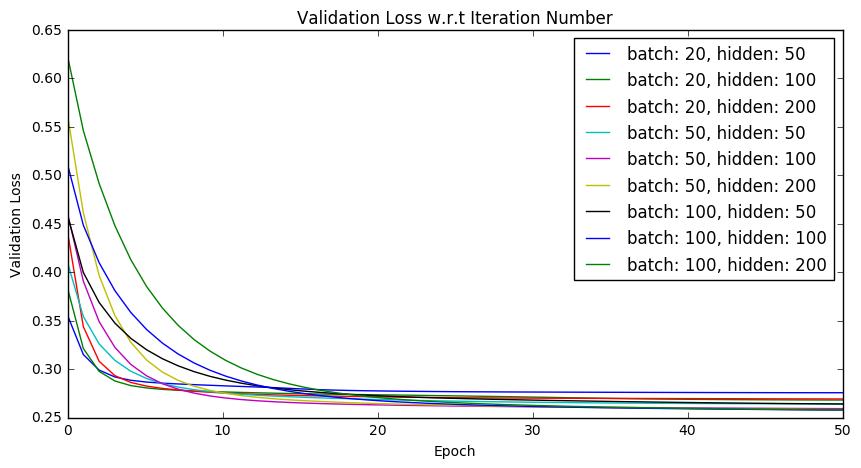

In [119]:
plt.figure(figsize=(10,5))
epochlist2 = np.linspace(0,50,50)
n =0
for i in range (len(batchlist)):
    for j in range(len(hidden)):
        plt.plot(epochlist2,validation[n],label = 'batch: %d, hidden: %d' %(batchlist[i],hidden[j]) )
        n += 1

plt.legend()

plt.title('Validation Loss w.r.t Iteration Number')
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.show()



#### Fix batch size and hidden layer size separately, compare the effect when setting different values of the other variables 

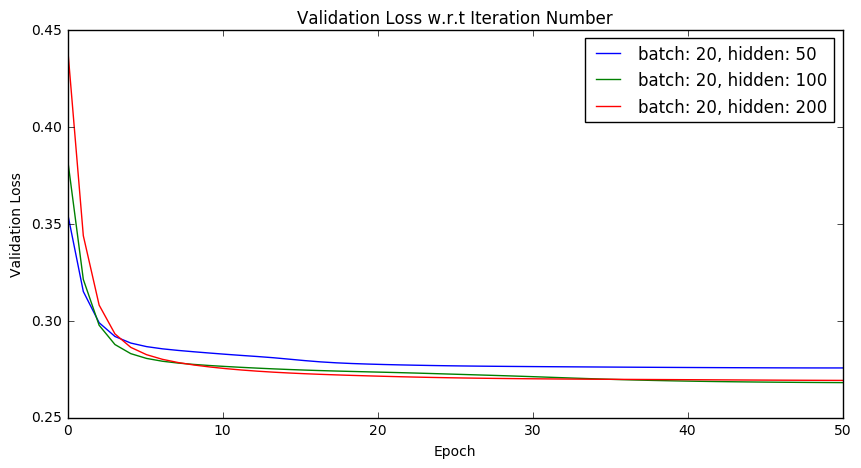

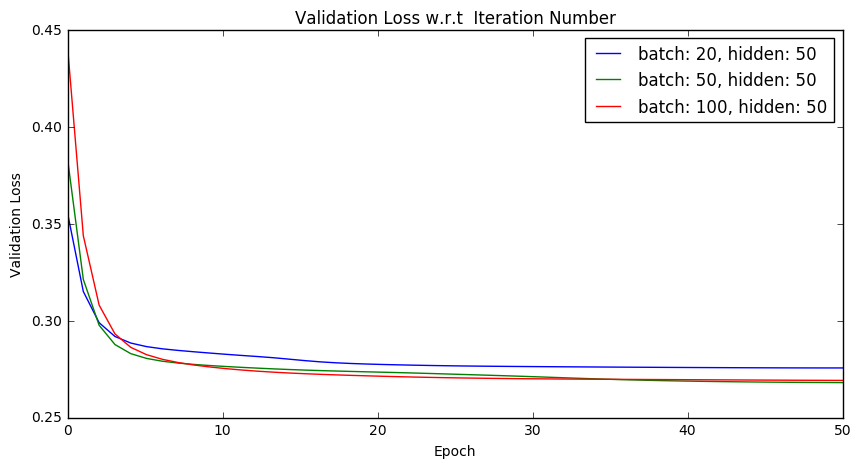

In [120]:
plt.figure(figsize=(10,5))
epochlist2 = np.linspace(0,50,50)
n =0

for j in range(len(hidden)):
    plt.plot(epochlist2,validation[n],label = 'batch: %d, hidden: %d' %(batchlist[0],hidden[j]) )
    n += 1

plt.legend()

plt.title('Validation Loss w.r.t Iteration Number')
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.show()

plt.figure(figsize=(10,5))
epochlist2 = np.linspace(0,50,50)
n =0

for j in range(len(batchlist)):
    plt.plot(epochlist2,validation[n],label = 'batch: %d, hidden: %d' %(batchlist[j],hidden[0]) )
    n += 1

plt.legend()

plt.title('Validation Loss w.r.t  Iteration Number')
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.show()

As compared through the calculated and plotted validation losses with respect to 9 combinations of different batch sizes and hidden layers, we find that the loss is the minimum when batch_size = 100 and hidden units = 100

## Part B:

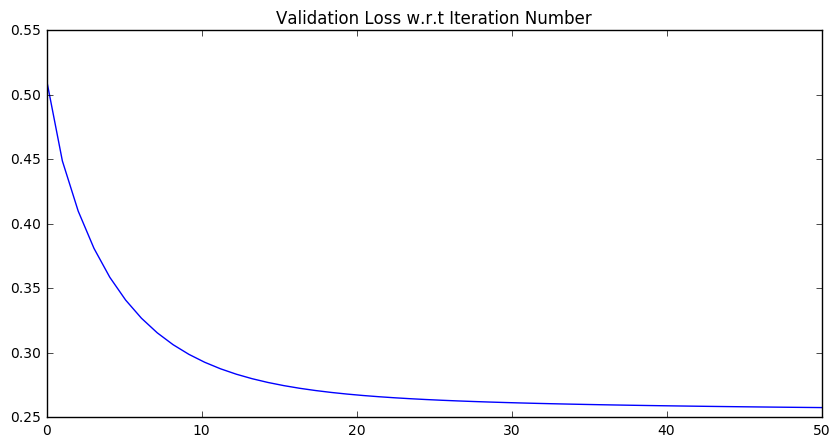

In [123]:
plt.figure(figsize=(10,5))

plt.title('Validation Loss w.r.t Iteration Number')
plt.plot(epochlist2,validation[7])
plt.show()


As can be seen from this plot, when iteration number is around 40, the validation loss basically converges to a constant value, and we can stop tranning.

In [124]:
print ('The test error is: %f % %'% (test_scorelist[7] * 100))

The test error is: 3.380000 %


### Summary

### Summary
Compared with logistic regression classifier, MLP performs better since it can reduce the test error from original 8.21% to 3.38%. We can conclude that the MLP model is better in accuracy for classifying the digits. 

Although MLP usually takes a relatively long time to deal with data, the accuracy for dealing a large and complicated dataset is very high.